# Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.metrics import rand_score, adjusted_rand_score

from src.distances import euclidean_distances, chebyshev_distances,\
    cosine_distances, convert_distance_to_similarity
from src.graph import similarity_matrix_to_graph, plot_graph
from src.clustering import hierarchical_clustering, kmeans_clustering, em_clustering, spectral_clustering
from src.statistic import calculate_rand_index, calculate_modularity
from src.possible_clusters import return_number_of_possible_clusters
sns.set_theme()

Считаем данные

In [2]:
data_x = pd.read_excel('data/X_4_2.xlsx', header=None)
data_x.head()

,0,1,2,3
0,4.874290,1.977885,3.814924,1.059366
1,3.933569,1.958831,1.990646,1.942923
2,3.922034,1.976142,1.915643,2.006392
3,4.214626,2.051924,2.273481,1.941145
4,5.432904,2.305590,3.949039,1.483865


In [3]:
data_y = pd.read_excel('data/Y_4_2.xlsx', header=None)
data_y.head()

,0,1,2,3
0,0.611272,-0.325375,0.097232,0.964296
1,2.024987,1.036112,2.438120,1.118366
2,1.903445,1.098594,1.898920,0.817923
3,0.999167,-0.047694,0.220158,0.943614
4,1.098056,0.905748,0.933541,1.008437


Исследуем данные на наличие пропусков

In [4]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Оба набора данных не содержат пропущенных значений

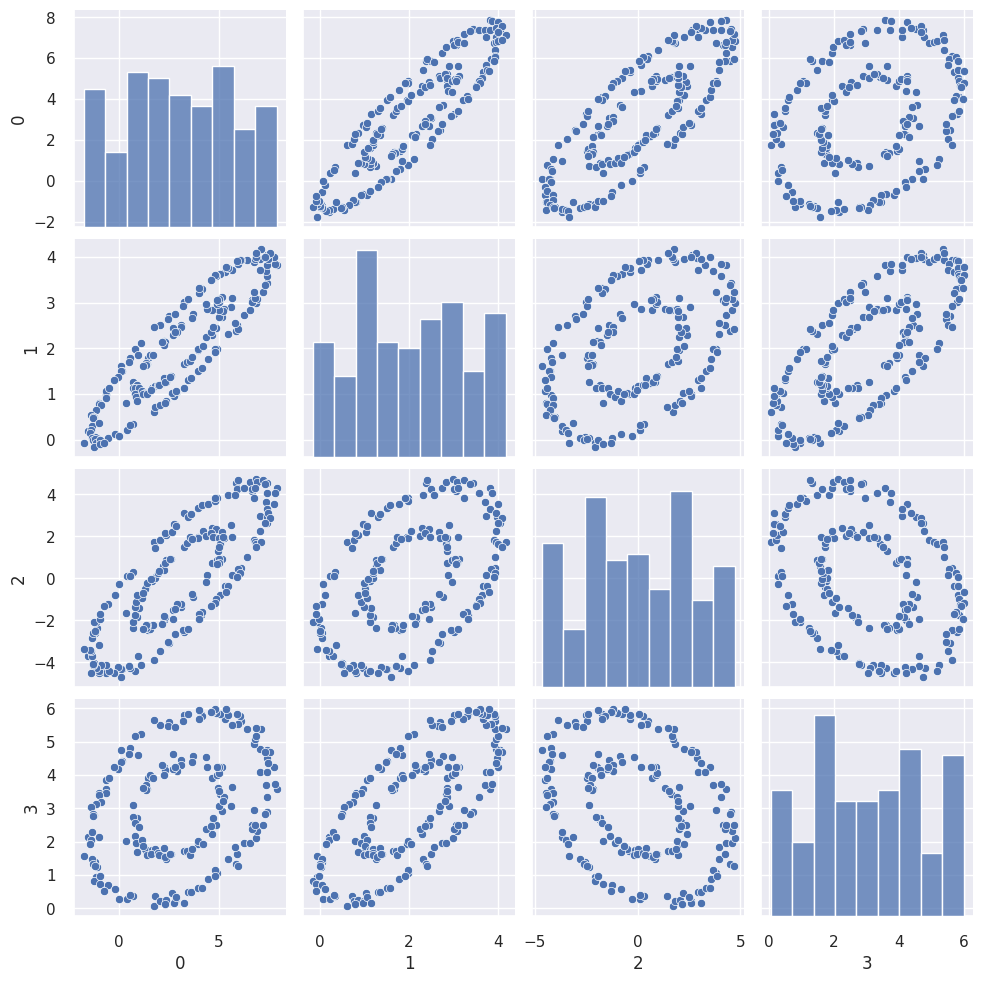

In [6]:
sns.pairplot(data_x)

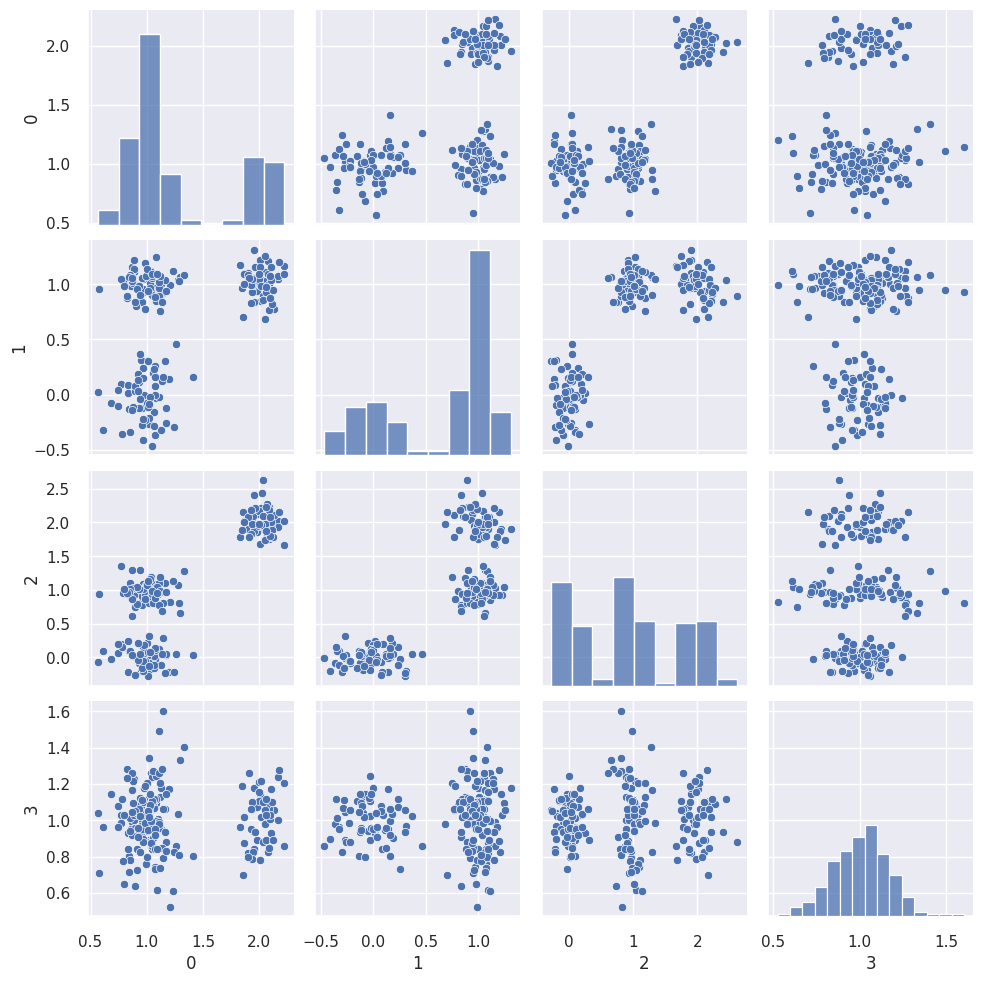

In [7]:
sns.pairplot(data_y)

## Матрицы расстояний

В исследовании рассмотрим 3 способа вычисления расстояний: Евклидово, Чебышева и манхэттенское 

In [8]:
chebyshev_x = chebyshev_distances(data_x)
euclidean_x = euclidean_distances(data_x)
cosine_x = cosine_distances(data_x)

In [9]:
chebyshev_y = chebyshev_distances(data_y)
euclidean_y = euclidean_distances(data_y)
cosine_y = cosine_distances(data_y)

In [10]:
pd.DataFrame(cosine_x)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0.044991,0.050888,0.034769,0.001756,0.04125,0.000043,0.001985,0.000014,0.005979,...,0.059516,0.049229,0.032135,0.003134,0.002336,0.043086,0.002474,0.000222,0.000242,0.000172
1,0.044991,0,0.000186,0.000671,0.029102,0.000083,0.042282,0.02821,0.046567,0.018319,...,0.001041,0.000098,0.0011,0.071445,0.067482,0.000021,0.068205,0.051451,0.038697,0.050652
2,0.050888,0.000186,0,0.001563,0.033901,0.000517,0.048008,0.032939,0.052561,0.022176,...,0.000347,0.000014,0.00219,0.078776,0.074619,0.000332,0.075378,0.057733,0.044188,0.056888
3,0.034769,0.000671,0.001563,0,0.020982,0.000282,0.032386,0.020224,0.03616,0.011999,...,0.003382,0.00128,0.000053,0.058473,0.054881,0.000454,0.055535,0.04049,0.029251,0.03978
4,0.001756,0.029102,0.033901,0.020982,0,0.026098,0.001249,0.000007,0.002081,0.001257,...,0.041039,0.032544,0.01894,0.009569,0.008133,0.027568,0.00839,0.003225,0.000694,0.003025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.043086,0.000021,0.000332,0.000454,0.027568,0.00002,0.040434,0.0267,0.04463,0.017103,...,0.001358,0.000209,0.000817,0.069056,0.065157,0,0.065869,0.049415,0.036929,0.048632
196,0.002474,0.068205,0.075378,0.055535,0.00839,0.063607,0.003169,0.008882,0.002118,0.016114,...,0.085735,0.073369,0.052209,0.000039,0.000002,0.065869,0,0.001215,0.004263,0.001343
197,0.000222,0.051451,0.057733,0.04049,0.003225,0.047451,0.00046,0.003533,0.000125,0.008499,...,0.066883,0.055968,0.037647,0.001689,0.001118,0.049415,0.001215,0,0.000927,0.000003
198,0.000242,0.038697,0.044188,0.029251,0.000694,0.035228,0.000081,0.000841,0.000372,0.003817,...,0.052266,0.042641,0.026836,0.005116,0.004081,0.036929,0.004263,0.000927,0,0.000822


In [11]:
pd.DataFrame(cosine_y)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0.470985,0.504922,0.061037,0.389107,0.108919,0.430921,0.088244,0.575495,0.065235,...,0.060404,0.055281,0.490267,0.560608,0.431522,0.372461,0.366252,0.571552,0.024778,0.435671
1,0.470985,0,0.007073,0.27195,0.056416,0.272483,0.05585,0.328483,0.081338,0.487028,...,0.451932,0.479255,0.061236,0.065436,0.008021,0.164042,0.093657,0.050237,0.399029,0.006196
2,0.504922,0.007073,0,0.276736,0.048137,0.26563,0.042278,0.319038,0.078287,0.478338,...,0.444887,0.489246,0.043515,0.051611,0.003889,0.152412,0.099367,0.04087,0.408816,0.004232
3,0.061037,0.27195,0.276736,0,0.197559,0.024423,0.222925,0.016662,0.375703,0.042945,...,0.031383,0.073168,0.26761,0.336735,0.219952,0.214192,0.218189,0.348859,0.01736,0.228297
4,0.389107,0.056416,0.048137,0.197559,0,0.14176,0.001728,0.198619,0.036359,0.348167,...,0.322105,0.30549,0.007963,0.021325,0.04079,0.031137,0.016026,0.026094,0.28902,0.030341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.372461,0.164042,0.152412,0.214192,0.031137,0.119391,0.036582,0.178058,0.06111,0.31505,...,0.29658,0.230176,0.043244,0.05678,0.140138,0,0.018788,0.074099,0.270147,0.12083
196,0.366252,0.093657,0.099367,0.218189,0.016026,0.149719,0.024269,0.215046,0.032426,0.365319,...,0.340424,0.272968,0.032827,0.037607,0.089518,0.018788,0,0.043267,0.289785,0.070464
197,0.571552,0.050237,0.04087,0.348859,0.026094,0.280229,0.018918,0.354731,0.007572,0.536505,...,0.505877,0.47864,0.010959,0.00195,0.053059,0.074099,0.043267,0,0.465304,0.038555
198,0.024778,0.399029,0.408816,0.01736,0.28902,0.03811,0.321208,0.020899,0.479413,0.016864,...,0.011947,0.030144,0.372366,0.447178,0.34213,0.270147,0.289785,0.465304,0,0.348032


In [12]:
pd.DataFrame(euclidean_x)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,2.234722,2.326139,1.895843,0.785892,1.880905,1.297672,1.344805,1.490155,1.357038,...,2.943833,2.697238,2.354043,1.719225,1.242152,2.409264,1.011367,0.592217,0.188935,0.138798
1,2.234722,0.0,0.100431,0.40946,2.532643,0.926141,3.262312,3.053247,3.487576,2.773081,...,0.946687,0.708431,0.552901,1.932856,1.960038,0.368222,2.0591,1.96569,2.046621,2.272574
2,2.326139,0.100431,0.0,0.472925,2.607489,0.947058,3.337776,3.120625,3.563296,2.833323,...,0.924041,0.699435,0.593823,2.02564,2.059381,0.382982,2.159481,2.064512,2.137732,2.366245
3,1.895843,0.40946,0.472925,0.0,2.136621,0.581091,2.867119,2.647835,3.092776,2.363943,...,1.342204,1.093825,0.862496,1.898722,1.823178,0.742379,1.874054,1.704126,1.706957,1.94884
4,0.785892,2.532643,2.607489,2.136621,0.0,1.896597,0.730527,0.59614,0.956249,0.578524,...,3.376804,3.120109,2.797005,2.472225,2.009698,2.791591,1.79061,1.355904,0.833625,0.911426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.409264,0.368222,0.382982,0.742379,2.791591,1.290534,3.515299,3.335148,3.738721,3.075819,...,0.603601,0.35161,0.235304,1.815523,1.934113,0.0,2.075037,2.060277,2.225713,2.427959
196,1.011367,2.0591,2.159481,1.874054,1.79061,2.150263,2.274582,2.355936,2.445142,2.348445,...,2.467667,2.261541,1.928991,0.745011,0.257969,2.075037,0.0,0.444044,0.969799,0.904823
197,0.592217,1.96569,2.064512,1.704126,1.355904,1.872087,1.884755,1.931691,2.069794,1.907335,...,2.534392,2.303468,1.958422,1.127088,0.654183,2.060277,0.444044,0.0,0.527636,0.510173
198,0.188935,2.046621,2.137732,1.706957,0.833625,1.703304,1.421736,1.419478,1.624526,1.379701,...,2.766107,2.517906,2.175894,1.638729,1.178376,2.225713,0.969799,0.527636,0.0,0.268841


## Матрицы схожести и графовая модель

Для вычисления матрицы близости воспользуемся формулой: $similarity = \exp{(- \frac{||x - x'||^2}{2*\sigma^2})}$

In [13]:
similarity_euclidean_x = convert_distance_to_similarity(euclidean_x, 1.36)
similarity_chebyshev_x = convert_distance_to_similarity(chebyshev_x, 1.32)
similarity_cosine_x = convert_distance_to_similarity(cosine_x, 1)

similarity_chebyshev_y = convert_distance_to_similarity(chebyshev_y, 1.32)
similarity_euclidean_y = convert_distance_to_similarity(euclidean_y, 1)
similarity_cosine_y = convert_distance_to_similarity(cosine_y, 1)

In [14]:
similarity_cosine_x

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.998988,0.998706,0.999396,0.999998,0.999150,1.000000,0.999998,1.000000,0.999982,...,0.998230,0.998789,0.999484,0.999995,0.999997,0.999072,0.999997,1.000000,1.000000,1.000000
1,0.998988,1.000000,1.000000,1.000000,0.999577,1.000000,0.999107,0.999602,0.998916,0.999832,...,0.999999,1.000000,0.999999,0.997451,0.997726,1.000000,0.997677,0.998677,0.999252,0.998718
2,0.998706,1.000000,1.000000,0.999999,0.999426,1.000000,0.998848,0.999458,0.998620,0.999754,...,1.000000,1.000000,0.999998,0.996902,0.997220,1.000000,0.997163,0.998335,0.999024,0.998383
3,0.999396,1.000000,0.999999,1.000000,0.999780,1.000000,0.999476,0.999796,0.999346,0.999928,...,0.999994,0.999999,1.000000,0.998292,0.998495,1.000000,0.998459,0.999181,0.999572,0.999209
4,0.999998,0.999577,0.999426,0.999780,1.000000,0.999660,0.999999,1.000000,0.999998,0.999999,...,0.999158,0.999471,0.999821,0.999954,0.999967,0.999620,0.999965,0.999995,1.000000,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.999072,1.000000,1.000000,1.000000,0.999620,1.000000,0.999183,0.999644,0.999005,0.999854,...,0.999999,1.000000,1.000000,0.997618,0.997880,1.000000,0.997833,0.998780,0.999318,0.998818
196,0.999997,0.997677,0.997163,0.998459,0.999965,0.997979,0.999995,0.999961,0.999998,0.999870,...,0.996331,0.997312,0.998638,1.000000,1.000000,0.997833,1.000000,0.999999,0.999991,0.999999
197,1.000000,0.998677,0.998335,0.999181,0.999995,0.998875,1.000000,0.999994,1.000000,0.999964,...,0.997766,0.998435,0.999292,0.999999,0.999999,0.998780,0.999999,1.000000,1.000000,1.000000
198,1.000000,0.999252,0.999024,0.999572,1.000000,0.999380,1.000000,1.000000,1.000000,0.999993,...,0.998635,0.999091,0.999640,0.999987,0.999992,0.999318,0.999991,1.000000,1.000000,1.000000


Графовая модель

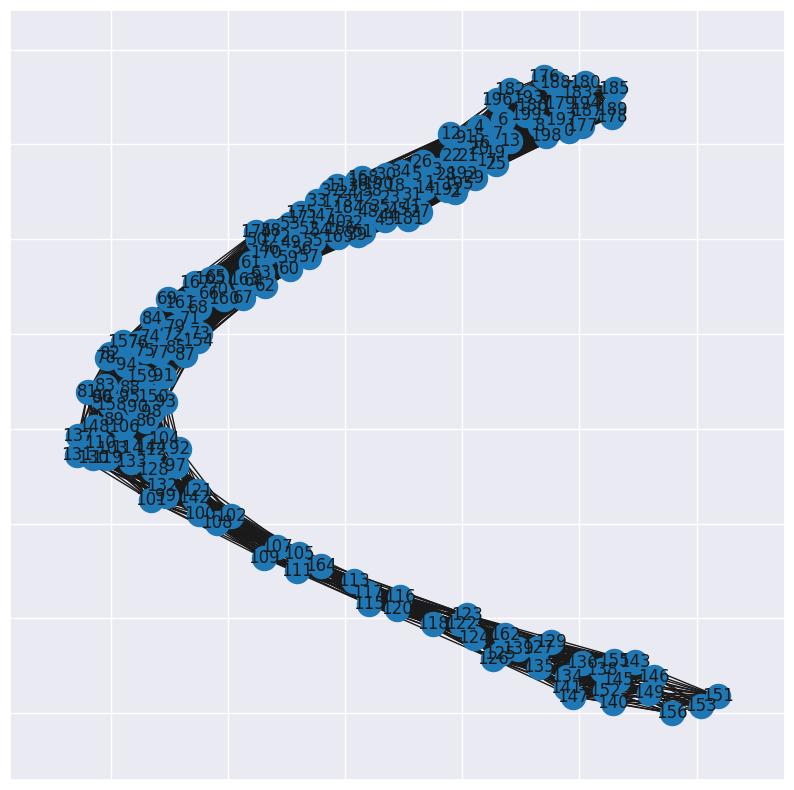

In [15]:
cosine_graph_x = similarity_matrix_to_graph(similarity_cosine_x, threshold=0.999)
plot_graph(cosine_graph_x)

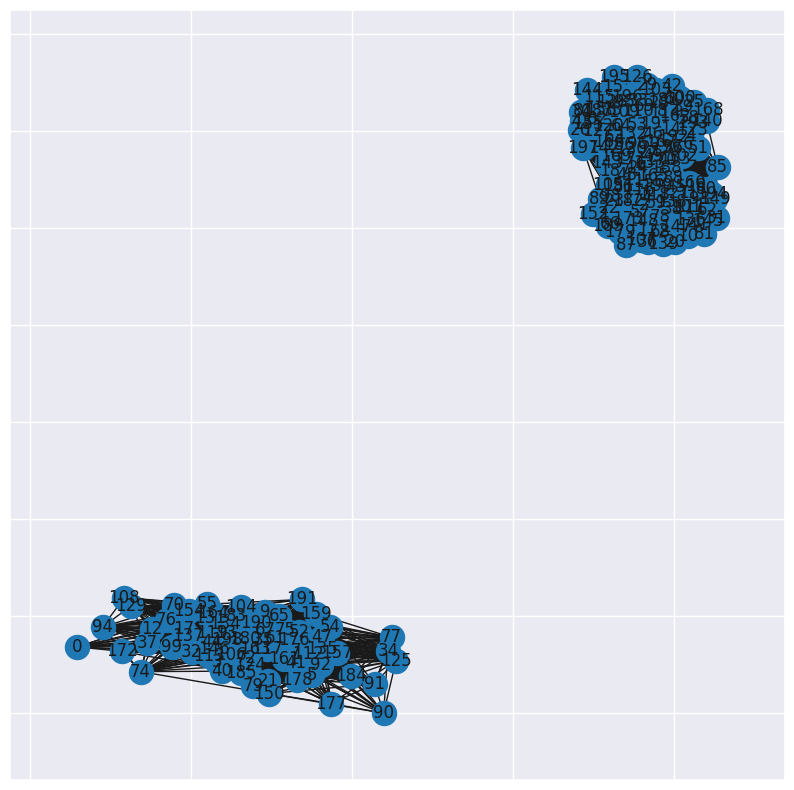

In [16]:
similarity_cosine_y_graph = similarity_matrix_to_graph(similarity_cosine_y, threshold=0.999)
plot_graph(similarity_cosine_y_graph)

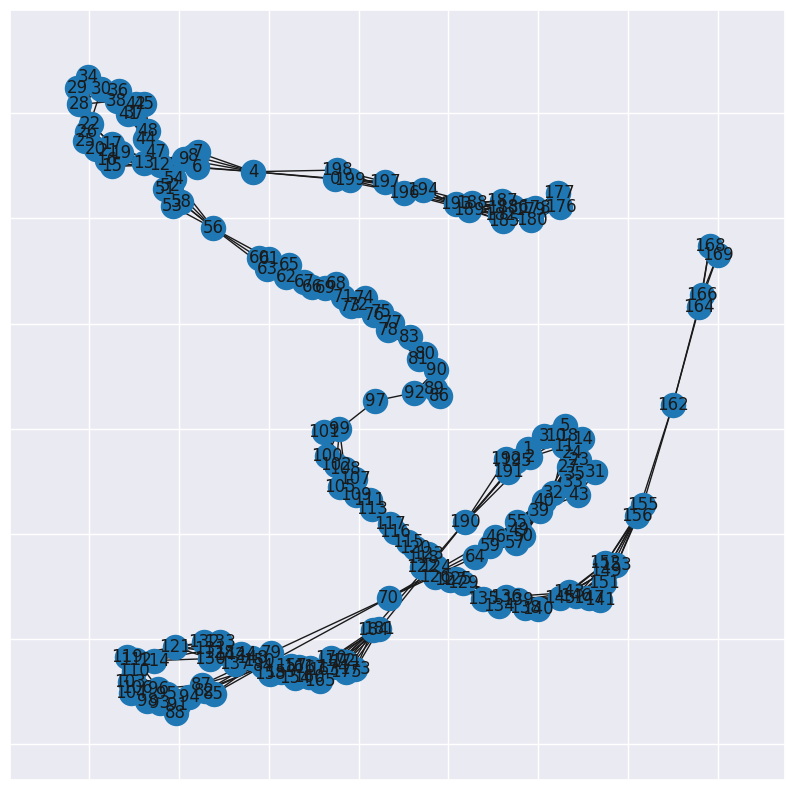

In [17]:
similarity_euclidean_x_graph = similarity_matrix_to_graph(similarity_euclidean_x, threshold=0.7)
plot_graph(similarity_euclidean_x_graph)

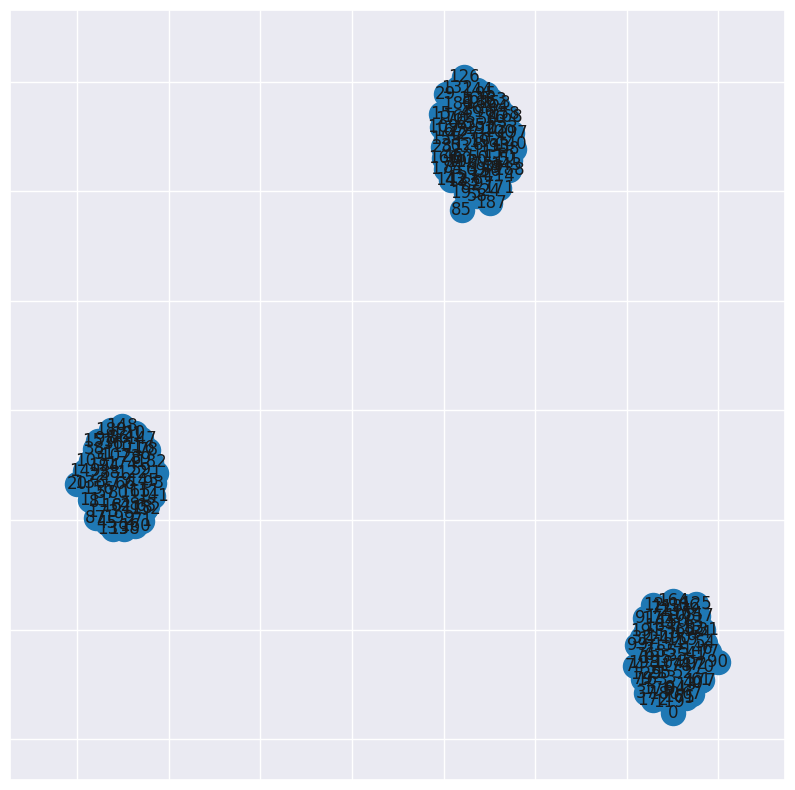

In [18]:
similarity_euclidean_y = convert_distance_to_similarity(euclidean_y, 1)
similarity_euclidean_y_graph = similarity_matrix_to_graph(similarity_euclidean_y, threshold=0.75)
plot_graph(similarity_euclidean_y_graph)

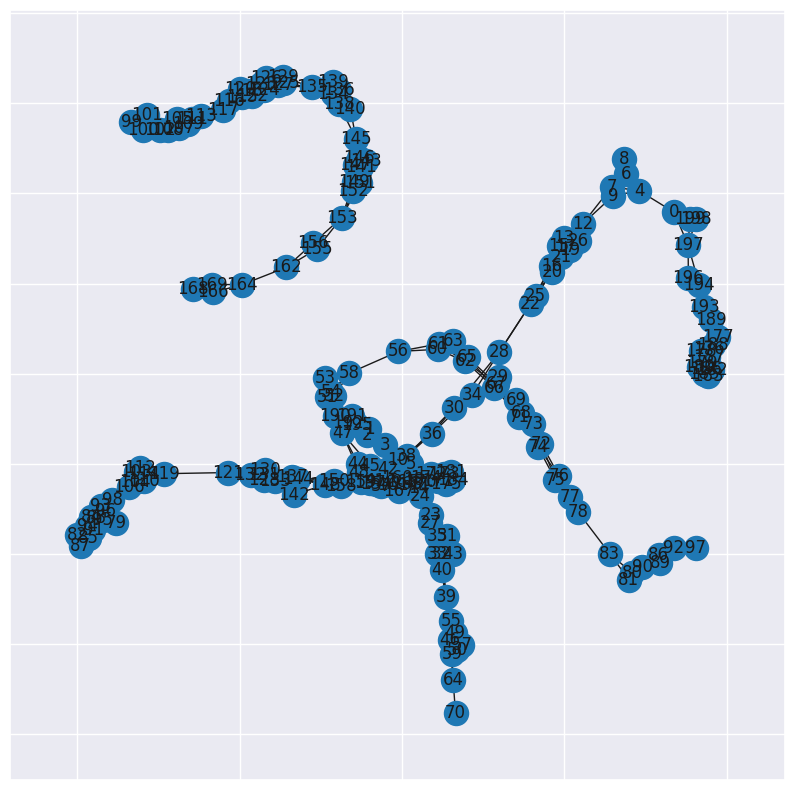

In [19]:
similarity_chebyshev_x_graph = similarity_matrix_to_graph(similarity_chebyshev_x, threshold=0.9)
plot_graph(similarity_chebyshev_x_graph)

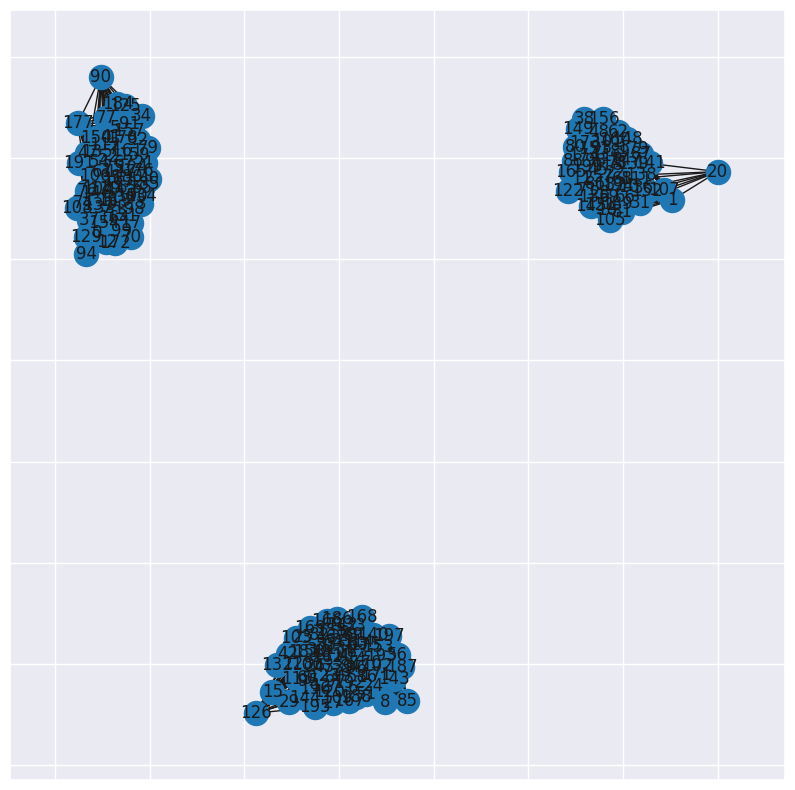

In [20]:
similarity_chebyshev_y_graph = similarity_matrix_to_graph(similarity_chebyshev_y, threshold=0.95)
plot_graph(similarity_chebyshev_y_graph)

In [21]:
singularity_graphs = {
    "data_x": {
        "euclidean" : similarity_matrix_to_graph(similarity_euclidean_x, threshold=0),
        "chebyshev" : similarity_matrix_to_graph(similarity_chebyshev_x, threshold=0),
        "cosine": similarity_matrix_to_graph(similarity_cosine_x, threshold=0),
    },
    "data_y": {
        "euclidean" : similarity_matrix_to_graph(similarity_euclidean_x, threshold=0),
        "chebyshev" : similarity_matrix_to_graph(similarity_chebyshev_x, threshold=0),
        "cosine": similarity_matrix_to_graph(similarity_cosine_x, threshold=0),
    },
}

# Кластеризация для числа кластеров k=2

In [22]:
clusterization_k2 = {
    "data_x": {
        "hierarchical" : {
            "euclidean" : hierarchical_clustering(data_x, euclidean_x, clusters=2, method='single'),
            "chebyshev" : hierarchical_clustering(data_x, chebyshev_x, clusters=2, method='single'),
            "cosine": hierarchical_clustering(data_x, cosine_x, clusters=2, method='single')
        },
        "kmeans": kmeans_clustering(data_x, clusters=2),
        "em": em_clustering(data_x, clusters=2),
        "spectral": {
            "euclidean" : spectral_clustering(euclidean_x, clusters=2),
            "chebyshev" : spectral_clustering(chebyshev_x, clusters=2),
            "cosine": spectral_clustering(cosine_x, clusters=2)
        }    
    }, 
    "data_y": {
        "hierarchical" : {
            "euclidean" : hierarchical_clustering(data_y, euclidean_y, clusters=2, method='single'),
            "chebyshev" : hierarchical_clustering(data_y, chebyshev_y, clusters=2, method='single'),
            "cosine": hierarchical_clustering(data_y, cosine_y, clusters=2, method='single')
        },
        "kmeans": kmeans_clustering(data_y, clusters=2),
        "em": em_clustering(data_y, clusters=2),
        "spectral": {
            "euclidean" : spectral_clustering(euclidean_y, clusters=2),
            "chebyshev" : spectral_clustering(chebyshev_y, clusters=2),
            "cosine": spectral_clustering(cosine_y, clusters=2)
        }    
    },
}

In [43]:
from src.statistic import _process_dict

def draw_clusters(data, clusters, method_ = None):

    number_of_colors = len(set(clusters))
    colormap = plt.cm.get_cmap('viridis', number_of_colors)
    color = [colormap(value) for value in clusters]

    fig, ax = plt.subplots(4, 3, figsize=(24, 14))
    i = 0
    j = 0
    for column1 in data.keys():
        for column2 in data.keys():
            if column1 != column2:
                ax[i, j].scatter(data[column2], data[column1], c = color)
                ax[i, j].setlabel(f'var {column2}', fontweight='bold')
                if i == 0:
                  if method_ != None:
                    ax[i, j].set_title('Data (' + method_ + ')', fontweight='bold')
                  else:
                    ax[i, j].set_title('Data', fontweight='bold')
                if j == 0:
                    ax[i, j].set_ylabel(f'var {column1}', fontweight='bold')
                j += 1
                if j == 3:
                    j = 0
                    i+= 1
    plt.show()

processed = _process_dict(clusterization_k2['data_x'])

for key in processed.keys():
    draw_clusters(data_x, processed)

/tmp/ipykernel_3187/889492885.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', number_of_colors)


UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.Int64DType'>) -> None

RAND индекс

In [23]:
calculate_rand_index(clusterization_k2['data_x'])

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,0.504724,0.500704,0.517588,0.498291,0.49794
hierarchical_chebyshev,1.0,1.0,1.0,0.504724,0.500704,0.517588,0.498291,0.49794
hierarchical_cosine,1.0,1.0,1.0,0.504724,0.500704,0.517588,0.498291,0.49794
kmeans,0.504724,0.504724,0.504724,1.0,0.729849,0.502513,0.504724,0.49995
em,0.500704,0.500704,0.500704,0.729849,1.0,0.513769,0.497688,0.49794
spectral_euclidean,0.517588,0.517588,0.517588,0.502513,0.513769,1.0,0.500704,0.49995
spectral_chebyshev,0.498291,0.498291,0.498291,0.504724,0.497688,0.500704,1.0,0.508794
spectral_cosine,0.49794,0.49794,0.49794,0.49995,0.49794,0.49995,0.508794,1.0


In [212]:
calculate_rand_index(clusterization_k2['data_x'], adjusted_rand_score)

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,0.009644,-0.001379,-0.006707,-0.003568,-0.004053
hierarchical_chebyshev,1.0,1.0,1.0,0.009644,-0.001379,-0.006707,-0.003568,-0.004053
hierarchical_cosine,1.0,1.0,1.0,0.009644,-0.001379,-0.006707,-0.003568,-0.004053
kmeans,0.009644,0.009644,0.009644,1.0,0.459827,0.008556,0.00946,-0.000106
em,-0.001379,-0.001379,-0.001379,0.459827,1.0,-0.023583,-0.004804,-0.004039
spectral_euclidean,-0.006707,-0.006707,-0.006707,0.008556,-0.023583,1.0,-0.001289,0.001114
spectral_chebyshev,-0.003568,-0.003568,-0.003568,0.00946,-0.004804,-0.001289,1.0,0.017592
spectral_cosine,-0.004053,-0.004053,-0.004053,-0.000106,-0.004039,0.001114,0.017592,1.0


In [213]:
calculate_rand_index(clusterization_k2['data_y'])

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,0.528894,0.594774,0.513769,0.497688,0.502513
hierarchical_chebyshev,1.0,1.0,1.0,0.528894,0.594774,0.513769,0.497688,0.502513
hierarchical_cosine,1.0,1.0,1.0,0.528894,0.594774,0.513769,0.497688,0.502513
kmeans,0.528894,0.528894,0.528894,1.0,0.545779,0.660754,0.501558,0.50598
em,0.594774,0.594774,0.594774,0.545779,1.0,0.502513,0.498291,0.498291
spectral_euclidean,0.513769,0.513769,0.513769,0.660754,0.502513,1.0,0.499296,0.521809
spectral_chebyshev,0.497688,0.497688,0.497688,0.501558,0.498291,0.499296,1.0,0.500704
spectral_cosine,0.502513,0.502513,0.502513,0.50598,0.498291,0.521809,0.500704,1.0


In [214]:
calculate_rand_index(clusterization_k2['data_y'], adjusted_rand_score)

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,0.040812,0.185332,-0.048218,-0.004169,-0.002212
hierarchical_chebyshev,1.0,1.0,1.0,0.040812,0.185332,-0.048218,-0.004169,-0.002212
hierarchical_cosine,1.0,1.0,1.0,0.040812,0.185332,-0.048218,-0.004169,-0.002212
kmeans,0.040812,0.040812,0.040812,1.0,0.082791,0.216986,0.003948,-0.001397
em,0.185332,0.185332,0.185332,0.082791,1.0,-0.035385,-0.003172,-0.007345
spectral_euclidean,-0.048218,-0.048218,-0.048218,0.216986,-0.035385,1.0,0.001999,-0.011469
spectral_chebyshev,-0.004169,-0.004169,-0.004169,0.003948,-0.003172,0.001999,1.0,0.001747
spectral_cosine,-0.002212,-0.002212,-0.002212,-0.001397,-0.007345,-0.011469,0.001747,1.0


Calculate modularity

In [215]:
calculate_modularity(singularity_graphs['data_x'], clusterization_k2['data_x'])

,modularity
hierarchical_euclidean,0.300113
hierarchical_chebyshev,0.420937
hierarchical_cosine,-0.003145
kmeans,0.052403
em,0.047466
spectral_euclidean,0.008347
spectral_chebyshev,-0.009465
spectral_cosine,-0.002912


In [216]:
calculate_modularity(singularity_graphs['data_y'], clusterization_k2['data_y'])

,modularity
hierarchical_euclidean,-0.010248
hierarchical_chebyshev,-0.010082
hierarchical_cosine,-0.002499
kmeans,-0.000746
em,-0.002321
spectral_euclidean,0.000007
spectral_chebyshev,-0.000435
spectral_cosine,-0.001723


# Кластеризация для числа кластеров k=3

In [217]:
clusterization_k3 = {
    "data_x": {
        "hierarchical" : {
            "euclidean" : hierarchical_clustering(data_x, euclidean_x, clusters=3, method='single'),
            "chebyshev" : hierarchical_clustering(data_x, chebyshev_x, clusters=3, method='single'),
            "cosine": hierarchical_clustering(data_x, cosine_x, clusters=3, method='single')
        },
        "kmeans": kmeans_clustering(data_x, clusters=3),
        "em": em_clustering(data_x, clusters=3),
        "spectral": {
            "euclidean" : spectral_clustering(euclidean_x, clusters=3),
            "chebyshev" : spectral_clustering(chebyshev_x, clusters=3),
            "cosine": spectral_clustering(cosine_x, clusters=3)
        }    
    }, 
    "data_y": {
        "hierarchical" : {
            "euclidean" : hierarchical_clustering(data_y, euclidean_y, clusters=3, method='single'),
            "chebyshev" : hierarchical_clustering(data_y, chebyshev_y, clusters=3, method='single'),
            "cosine": hierarchical_clustering(data_y, cosine_y, clusters=3, method='single')
        },
        "kmeans": kmeans_clustering(data_y, clusters=3),
        "em": em_clustering(data_y, clusters=3),
        "spectral": {
            "euclidean" : spectral_clustering(euclidean_y, clusters=3),
            "chebyshev" : spectral_clustering(chebyshev_y, clusters=3),
            "cosine": spectral_clustering(cosine_y, clusters=3)
        }    
    },
}

In [218]:
calculate_rand_index(clusterization_k3['data_x'])

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,0.551156,0.541809,0.468744,0.495678,0.525477
hierarchical_chebyshev,1.0,1.0,1.0,0.551156,0.541809,0.468744,0.495678,0.525477
hierarchical_cosine,1.0,1.0,1.0,0.551156,0.541809,0.468744,0.495678,0.525477
kmeans,0.551156,0.551156,0.551156,1.0,0.75005,0.371357,0.502412,0.559045
em,0.541809,0.541809,0.541809,0.75005,1.0,0.361809,0.5,0.547186
spectral_euclidean,0.468744,0.468744,0.468744,0.371357,0.361809,1.0,0.497487,0.391809
spectral_chebyshev,0.495678,0.495678,0.495678,0.502412,0.5,0.497487,1.0,0.499045
spectral_cosine,0.525477,0.525477,0.525477,0.559045,0.547186,0.391809,0.499045,1.0


In [219]:
calculate_rand_index(clusterization_k3['data_x'], adjusted_rand_score)

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,0.075724,0.054738,0.012079,-0.010839,0.025873
hierarchical_chebyshev,1.0,1.0,1.0,0.075724,0.054738,0.012079,-0.010839,0.025873
hierarchical_cosine,1.0,1.0,1.0,0.075724,0.054738,0.012079,-0.010839,0.025873
kmeans,0.075724,0.075724,0.075724,1.0,0.444316,-0.007375,-0.00233,0.036586
em,0.054738,0.054738,0.054738,0.444316,1.0,-0.010203,-0.007639,0.004964
spectral_euclidean,0.012079,0.012079,0.012079,-0.007375,-0.010203,1.0,0.013457,0.004637
spectral_chebyshev,-0.010839,-0.010839,-0.010839,-0.00233,-0.007639,0.013457,1.0,-0.008351
spectral_cosine,0.025873,0.025873,0.025873,0.036586,0.004964,0.004637,-0.008351,1.0


In [220]:
calculate_rand_index(clusterization_k3['data_y'])

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,1.0,1.0,0.414824,0.561558,0.55402
hierarchical_chebyshev,1.0,1.0,1.0,1.0,1.0,0.414824,0.561558,0.55402
hierarchical_cosine,1.0,1.0,1.0,1.0,1.0,0.414824,0.561558,0.55402
kmeans,1.0,1.0,1.0,1.0,1.0,0.414824,0.561558,0.55402
em,1.0,1.0,1.0,1.0,1.0,0.414824,0.561558,0.55402
spectral_euclidean,0.414824,0.414824,0.414824,0.414824,0.414824,1.0,0.393869,0.390352
spectral_chebyshev,0.561558,0.561558,0.561558,0.561558,0.561558,0.393869,1.0,0.551357
spectral_cosine,0.55402,0.55402,0.55402,0.55402,0.55402,0.390352,0.551357,1.0


In [221]:
calculate_rand_index(clusterization_k3['data_y'], adjusted_rand_score)

,hierarchical_euclidean,hierarchical_chebyshev,hierarchical_cosine,kmeans,em,spectral_euclidean,spectral_chebyshev,spectral_cosine
hierarchical_euclidean,1.0,1.0,1.0,1.0,1.0,0.044864,0.014707,0.007381
hierarchical_chebyshev,1.0,1.0,1.0,1.0,1.0,0.044864,0.014707,0.007381
hierarchical_cosine,1.0,1.0,1.0,1.0,1.0,0.044864,0.014707,0.007381
kmeans,1.0,1.0,1.0,1.0,1.0,0.044864,0.014707,0.007381
em,1.0,1.0,1.0,1.0,1.0,0.044864,0.014707,0.007381
spectral_euclidean,0.044864,0.044864,0.044864,0.044864,0.044864,1.0,0.012708,-0.00767
spectral_chebyshev,0.014707,0.014707,0.014707,0.014707,0.014707,0.012708,1.0,0.000181
spectral_cosine,0.007381,0.007381,0.007381,0.007381,0.007381,-0.00767,0.000181,1.0


Calculate modularity

In [222]:
calculate_modularity(singularity_graphs['data_x'], clusterization_k3['data_x'])


,modularity
hierarchical_euclidean,0.371886
hierarchical_chebyshev,0.500401
hierarchical_cosine,-0.002272
kmeans,0.041504
em,0.048739
spectral_euclidean,0.012978
spectral_chebyshev,-0.010473
spectral_cosine,-0.002948


In [223]:
calculate_modularity(singularity_graphs['data_y'], clusterization_k3['data_y'])

,modularity
hierarchical_euclidean,-0.007762
hierarchical_chebyshev,-0.004377
hierarchical_cosine,-0.002888
kmeans,-0.002888
em,-0.002888
spectral_euclidean,-0.000964
spectral_chebyshev,-0.013418
spectral_cosine,-0.002844


# Общий случай

elbow val = 2
elbow score = 1730.319802329205


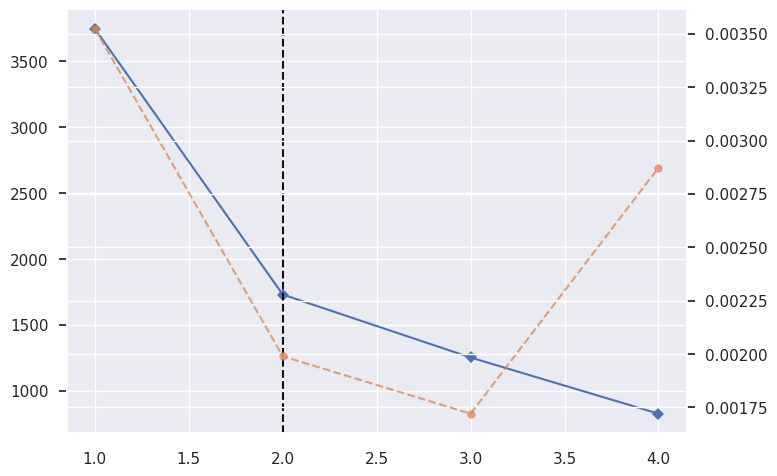

In [224]:
vals, scores = return_number_of_possible_clusters(data_x, k=(1,5))
print(f"elbow val = {vals}\nelbow score = {scores}")


elbow val = 3
elbow score = 18.144501995580924


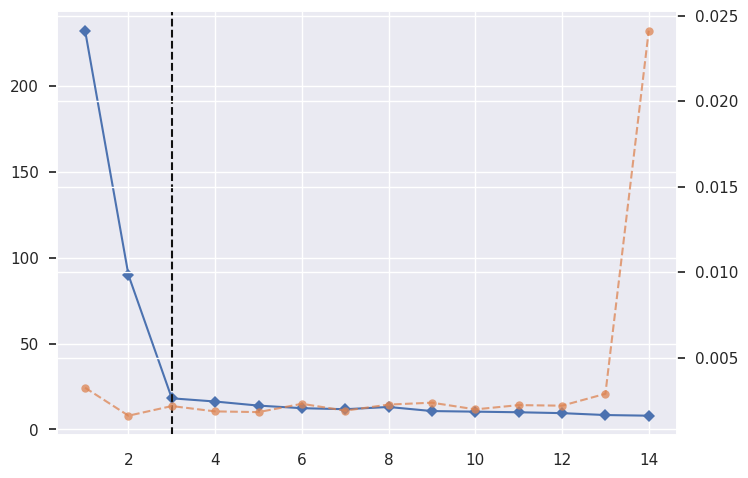

In [225]:
vals, scores = return_number_of_possible_clusters(data_y, k=(1, 15))
print(f"elbow val = {vals}\nelbow score = {scores}")